<a href="https://colab.research.google.com/github/RaianaSeixas/Portifolio/blob/main/Python_for_Finance/Web_Scraping_Yahoo_Finance_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Web scraping is the process of using a program to extract content and data from a website.

In [44]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [45]:
url_link = 'https://finance.yahoo.com/quote/TSLA/profile'

#A request header is used in an HTTP request to provide information about the request context, so that the server can tailor the response. We provided data for a standard web browser.
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}) 

data = pd.read_html(r.text)
data=data[0] #get firt table of the page 
data.style #return a Slyler object


,Name,Title,Pay,Exercised,Year Born
0,Mr. Elon R. Musk,"Technoking of Tesla, CEO & Director",nan,23.45B,1972.000000
1,Mr. Zachary John Planell Kirkhorn,Master of Coin & CFO,301.15k,3.2M,1986.000000
2,Mr. Andrew D. Baglino,Sr. VP of Powertrain & Energy Engineering,301.15k,20.06M,1981.000000
3,Mr. Vaibhav Taneja,Corp. Controller & Chief Accounting Officer,nan,nan,1978.000000
4,Mr. Martin Viecha,Sr. Director for Investor Relations,nan,nan,nan
5,Mr. Alan Prescott,VP of Legal,nan,nan,1979.000000
6,Mr. Dave Arnold,Sr. Director of Global Communications,nan,nan,nan
7,Brian Scelfo,Sr. Director of Corp. Devel.,nan,nan,nan
8,Mr. Jeffrey B. Straubel,Sr. Advisor,nan,nan,1976.000000
9,Mr. Franz von Holzhausen,Chief Designer,nan,nan,nan


In [46]:
# Let's scrape the Earnings Estimates from the Analysis page and plot it as a bar chart:

url_link2 = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link2,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

data2 = pd.read_html(r.text)
df2 = data2[0]
df2

,Earnings Estimate,Current Qtr. (Jun 2022),Next Qtr. (Sep 2022),Current Year (2022),Next Year (2023)
0,No. of Analysts,22.00,22.00,32.00,30.00
1,Avg. Estimate,2.16,3.15,12.14,15.87
2,Low Estimate,1.65,2.26,8.23,11.10
3,High Estimate,3.00,4.10,17.06,25.06
4,Year Ago EPS,1.45,1.86,6.78,12.14


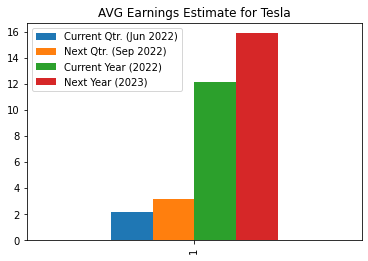

In [47]:
df3 = df2[df2['Earnings Estimate'] == 'Avg. Estimate']
df3.plot(kind='bar')
#plt.savefig('plot.png')
plt.title('AVG Earnings Estimate for Tesla')
plt.show()

In [48]:
# Let's scrape the Growth Estimates Estimates from the Analysis page and plot it as a bar chart:

df4=data2[5] #get 6th table from the page
df4


,Growth Estimates,TSLA,Industry,Sector(s),S&P 500
0,Current Qtr.,49.00%,NaN,NaN,NaN
1,Next Qtr.,69.40%,NaN,NaN,NaN
2,Current Year,79.10%,NaN,NaN,NaN
3,Next Year,30.70%,NaN,NaN,NaN
4,Next 5 Years (per annum),39.73%,NaN,NaN,NaN
5,Past 5 Years (per annum),NaN,NaN,NaN,NaN


In [49]:
#Cleaning and transforming data

df4=df4[['Growth Estimates','TSLA']] # select columns 
df4.drop(df4.tail(1).index,inplace=True) # drop line with NaN
df4


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Growth Estimates,TSLA
0,Current Qtr.,49.00%
1,Next Qtr.,69.40%
2,Current Year,79.10%
3,Next Year,30.70%
4,Next 5 Years (per annum),39.73%


In [50]:
#df4.plot(kind='bar')

In [51]:
print(df4.iat[0,1])
type(df4.iat[0,1]) # we have a string that has to be converted to number

49.00%


str

In [52]:
df4['TSLA'] = df4['TSLA'].map(lambda x: str(x)[:-1]) #remove % from the end of te string 
df4['TSLA'] = df4['TSLA'].astype(float) # transform text in number
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Growth Estimates,TSLA
0,Current Qtr.,49.00
1,Next Qtr.,69.40
2,Current Year,79.10
3,Next Year,30.70
4,Next 5 Years (per annum),39.73


In [53]:
type(df4.iat[0,1])

numpy.float64

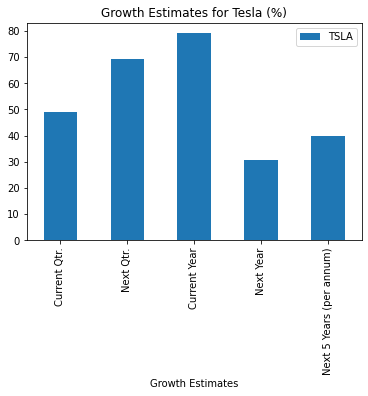

In [54]:
df4.plot(x='Growth Estimates',y='TSLA',kind='bar', title='Growth Estimates for Tesla (%)')